# Introduction by Example

## Data Handling of Graphs

In [1]:
import torch
from torch_geometric.data import Data

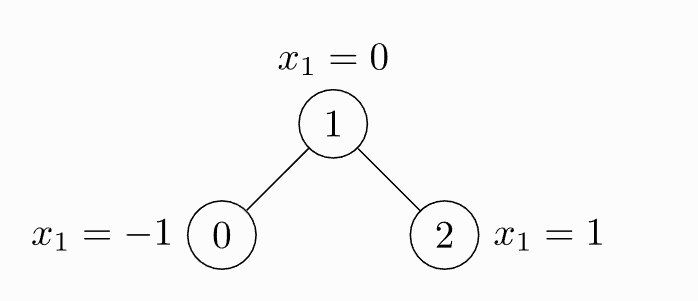

In [2]:
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)
data = Data(x=x, edge_index=edge_index)
data

Data(x=[3, 1], edge_index=[2, 4])

In [4]:
edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t().contiguous())  # contiguous でメモリ上で要素順に並べる。 https://qiita.com/kenta1984/items/d68b72214ce92beebbe2
data

Data(x=[3, 1], edge_index=[2, 4])

２つの edge でも４つ定義しないといけない。

>Although the graph has only two edges, we need to define four index tuples to account for both directions of a edge.

In [5]:
data.validate(raise_on_error=True)  # data のチェック

True

In [6]:
for key, item in data:
    print(f"{key}: {item}")

x: tensor([[-1.],
        [ 0.],
        [ 1.]])
edge_index: tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])


In [7]:
print(data.num_nodes)
print(data.num_edges)
print(data.num_node_features)
print(data.has_isolated_nodes())
print(data.has_self_loops())
print(data.is_directed())

3
4
1
False
False
False


In [8]:
data = data.to('cuda:0')

## Common Benchmark Datasets

In [9]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

Processing...
Done!


In [10]:
len(dataset)

600

In [11]:
print(dataset.num_classes)
print(dataset.num_node_features)

6
3


In [12]:
data = dataset[0]
print(data)

Data(edge_index=[2, 168], x=[37, 3], y=[1])


37 nodes and 168/2 = 84 edges

In [18]:
train_dataset = dataset[:540]
test_dataset = dataset[540:]

In [19]:
dataset = dataset.shuffle()

In [24]:
perm = torch.randperm(len(dataset))
print(perm[:5])
dataset = dataset[perm]

tensor([261, 276, 321, 416, 360])


In [27]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')

In [28]:
print(len(dataset))
print(dataset.num_classes)
print(dataset.num_node_features)

1
7
1433


In [33]:
data = dataset[0]
print(data)
print(data.is_undirected())

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
True


## Mini-batches

隣接行列の情報を node feature に加えて batch を作成する。

In [34]:
from torch_geometric.loader import DataLoader

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [39]:
print(len(dataset))
print(dataset[0])

600
Data(edge_index=[2, 168], x=[37, 21], y=[1])


In [43]:
for batch in loader:
    break
    
print(batch)
print(batch.num_graphs)
print(batch['batch'])
print(batch['ptr'])

DataBatch(edge_index=[2, 3428], x=[897, 21], y=[32], batch=[897], ptr=[33])
32
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  

ptr は調べてもよくわからんかったけど、内部で使われるものらしい。

In [49]:
batch.edge_index

tensor([[  0,   0,   0,  ..., 896, 896, 896],
        [  1,  32,  33,  ..., 879, 892, 895]])

In [54]:
batch.x.size()

torch.Size([897, 21])

## Data Transforms

## Learning Methods on Graphs

In [55]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')

In [59]:
print(len(dataset))
print(dataset[0])
print(dataset[0].edge_index[:10])

1
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
tensor([[ 633, 1862, 2582,  ...,  598, 1473, 2706],
        [   0,    0,    0,  ..., 2707, 2707, 2707]])


In [82]:
edge_index[:, torch.where(edge_index[0] == 0)[0].tolist()]

tensor([[   0,    0,    0],
        [ 633, 1862, 2582]])

In [83]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

In [91]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
losses = []
for epoch in range(50):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    losses.append(loss.detach().cpu().item())

In [107]:
print(out.shape)

torch.Size([2708, 7])


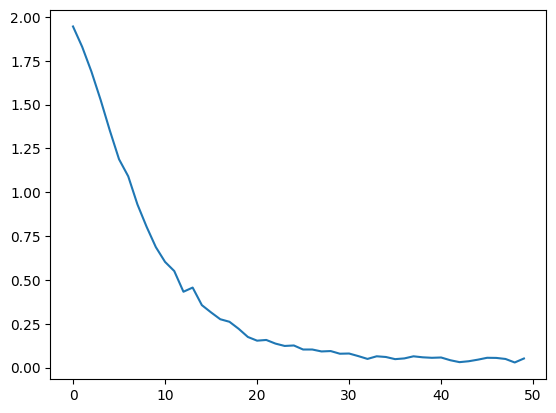

In [95]:
from matplotlib import pyplot as plt

plt.plot([i for i in range(len(losses))], losses)

In [105]:
model.eval()
pred = model(data).argmax(dim=1)

correct = (pred[data.train_mask] == data.y[data.train_mask]).sum()
acc = int(correct) / int(data.train_mask.sum())
print(f'Accuracy: {acc:.4f}')

correct = (pred[data.val_mask] == data.y[data.val_mask]).sum()
acc = int(correct) / int(data.val_mask.sum())
print(f'Accuracy: {acc:.4f}')

correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')

Accuracy: 1.0000
Accuracy: 0.7640
Accuracy: 0.7800


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [ ]:
.